In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# File path
data = pd.read_csv("~/Downloads/FeedGrains.csv")

In [23]:
data = data.drop(['SC_Group_ID', 'SC_GroupCommod_ID', 'SC_Commodity_ID', 
                  'SC_Attribute_ID', 'SC_Unit_ID', 'SortOrder', 
                  'SC_Frequency_ID', 'Timeperiod_ID', 'SC_Geography_ID'], axis=1)

In [25]:
# Filter the dataset to keep only rows with 'Monthly' in SC_Frequency_Desc
data = data[data['SC_Frequency_Desc'] == 'Monthly']

# Reset index after filtering (optional)
data.reset_index(drop=True, inplace=True)

# Display the first few rows to verify
data.head()

,SC_Group_Desc,SC_GroupCommod_Desc,SC_GeographyIndented_Desc,SC_Commodity_Desc,SC_Attribute_Desc,SC_Unit_Desc,Year_ID,SC_Frequency_Desc,Timeperiod_Desc,Amount
0,Exports and imports,Corn,South Korea,Corn products,"Imports, to U.S. from specified source","1,000 metric tons",1996,Monthly,Jan,0.011913
1,Exports and imports,Corn,South Korea,Corn products,"Imports, to U.S. from specified source","1,000 metric tons",1996,Monthly,Feb,0.002170
2,Exports and imports,Corn,South Korea,Corn products,"Imports, to U.S. from specified source","1,000 metric tons",1996,Monthly,Mar,0.013735
3,Exports and imports,Corn,South Korea,Corn products,"Imports, to U.S. from specified source","1,000 metric tons",1996,Monthly,Apr,0.015224
4,Exports and imports,Corn,South Korea,Corn products,"Imports, to U.S. from specified source","1,000 metric tons",1996,Monthly,May,0.015686


In [27]:
# Create a Season column based on Timeperiod_Desc
data['Season'] = data['Timeperiod_Desc'].apply(lambda x: 'Winter' if x in ['Dec', 'Jan', 'Feb'] else 
                                                         'Spring' if x in ['Mar', 'Apr', 'May'] else 
                                                         'Summer' if x in ['Jun', 'Jul', 'Aug'] else 
                                                         'Fall')

# Display unique values to verify
print(data['Season'].unique())

['Winter' 'Spring' 'Summer' 'Fall']


In [29]:
data = data.drop(['SC_Frequency_Desc'], axis=1)

In [31]:
data = data.drop(['SC_Group_Desc', 'SC_GroupCommod_Desc'], axis=1)

In [33]:
# Remove leading and trailing white spaces from the column
data['SC_GeographyIndented_Desc'] = data['SC_GeographyIndented_Desc'].str.strip()

# Display unique values in the updated column
data['SC_GeographyIndented_Desc'].unique()

array(['South Korea', 'Hong Kong', 'Taiwan', 'Japan', 'Kosovo',
       'Australia (No Islands)', 'Papua New Guinea',
       'New Zealand, No Islands (=Old Code 6140)', 'Norfolk Island',
       'Cocos (Keeling) Islands', 'Christmas Island(Indian Ocean)',
       'Cook Islands', 'Tokelau Islands', 'Niue', 'Samoa',
       'Solomon Islands', 'Kiribati', 'New Caledonia', 'French Polynesia',
       'Marshall Islands', 'Micronesia, Federated States', 'Palau',
       'Fiji', 'Tonga', 'Morocco', 'Egypt', 'Algeria', 'Sudan',
       'Equatorial Guinea', 'Mauritania', 'Cameroon', 'Western Sahara',
       'Senegal', 'Mali', 'Guinea', 'Sierra Leone', 'Ivory Coast',
       'Ghana', 'Tunisia', 'The Gambia', 'Niger', 'Togo', 'Nigeria',
       'Libya', 'Central African Republic', 'Gabon', 'Chad', 'St Helena',
       'Burkina Faso', 'Benin', 'Angola', 'Congo(Brazzville)',
       'Guinea-Bissau', 'Cape Verde Islands', 'Sao Tome And Principe',
       'Liberia', 'Congo(Kinshasa)', 'Burundi', 'Rwanda', 'Somal

In [35]:
# Mapping USA-related names to 'United States of America'
usa_mapping = {
    'Central America': 'United States of America',
    'United States': 'United States of America',
    'United States of America': 'United States of America',
    'USA': 'United States of America',
    'U.S.': 'United States of America',
    'U.S.A.': 'United States of America',
    'America': 'United States of America',
    'North America': 'United States of America',
    'United States of America (US)': 'United States of America',
    'U.S. (United States)': 'United States of America',
    'U.S.A': 'United States of America',
    'U.S.A. (United States of America)': 'United States of America',
    'US (United States)': 'United States of America',
    'United States (US)': 'United States of America',
    'America (USA)': 'United States of America',
    'U.S. - Golden Triangle, MT': 'United States of America',
    'U.S. - Minneapolis, MN': 'United States of America',
    'World less U.S.': 'United States of America',
    'U.S. - Midwest': 'United States of America',
    'U.S. - Central IL': 'United States of America',
    'U.S. - Gulf ports, LA': 'United States of America',
    'U.S. - St Louis, MO': 'United States of America',
    'U.S. - AR points': 'United States of America',
    'U.S. - Omaha, NE': 'United States of America',
    'U.S. - Chicago, IL': 'United States of America',
    'U.S. - Kansas City, MO': 'United States of America',
    'U.S. - Domestic, East Coast': 'United States of America',
    'U.S. - Lawrenceburg, IN': 'United States of America',
    'U.S. - IL points, IL': 'United States of America',
    'U.S. - Central US': 'United States of America',
    'U.S. - Toledo, OH': 'United States of America',
    'U.S. - AR': 'United States of America',
    'U.S. - Memphis, TN': 'United States of America',
    'U.S. - New York, NY': 'United States of America',
}

In [37]:
russia_mapping = {
    'Russia': 'Russia',
    'Russian Federation': 'Russia',
    'Russian Federation, Begins 2/1992': 'Russia',
    'Former Ussr, Begins 1/1989 & Ends 1/1993': 'Russia',
    'Former Soviet Union-12': 'Russia',
    'USSR': 'Russia',
    'Union of Soviet Socialist Republics': 'Russia'
}

In [39]:
australia_mapping = {
    'Australia (No Islands)': 'Australia',
    'Norfolk Island': 'Australia',
    'Cocos (Keeling) Islands': 'Australia',
    'Christmas Island (Indian Ocean)': 'Australia'
}

In [41]:
germany_mapping = {
    'Germany, Fed. Republic; United, Begins 1': 'Germany',
    'German Democratic Republic, Ends 9/1990': 'Germany'
}

In [43]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:", missing_values)

# Drop rows with significant missing data or fill missing values
data = data.dropna()  # Example: Drop missing rows

Missing Values: SC_GeographyIndented_Desc    0
SC_Commodity_Desc            0
SC_Attribute_Desc            0
SC_Unit_Desc                 0
Year_ID                      0
Timeperiod_Desc              0
Amount                       0
Season                       0
dtype: int64


In [45]:
data['SC_GeographyIndented_Desc'].unique()

array(['South Korea', 'Hong Kong', 'Taiwan', 'Japan', 'Kosovo',
       'Australia (No Islands)', 'Papua New Guinea',
       'New Zealand, No Islands (=Old Code 6140)', 'Norfolk Island',
       'Cocos (Keeling) Islands', 'Christmas Island(Indian Ocean)',
       'Cook Islands', 'Tokelau Islands', 'Niue', 'Samoa',
       'Solomon Islands', 'Kiribati', 'New Caledonia', 'French Polynesia',
       'Marshall Islands', 'Micronesia, Federated States', 'Palau',
       'Fiji', 'Tonga', 'Morocco', 'Egypt', 'Algeria', 'Sudan',
       'Equatorial Guinea', 'Mauritania', 'Cameroon', 'Western Sahara',
       'Senegal', 'Mali', 'Guinea', 'Sierra Leone', 'Ivory Coast',
       'Ghana', 'Tunisia', 'The Gambia', 'Niger', 'Togo', 'Nigeria',
       'Libya', 'Central African Republic', 'Gabon', 'Chad', 'St Helena',
       'Burkina Faso', 'Benin', 'Angola', 'Congo(Brazzville)',
       'Guinea-Bissau', 'Cape Verde Islands', 'Sao Tome And Principe',
       'Liberia', 'Congo(Kinshasa)', 'Burundi', 'Rwanda', 'Somal

In [47]:
data['SC_Attribute_Desc'].unique()

array(['Imports, to U.S. from specified source',
       'Exports, from U.S. to specified destination', 'Prices, market',
       'Prices received by farmers', 'Hay stocks', 'Price ratio',
       'Producer price index', 'Rail car loadings',
       'Feed and residual use', 'Prices, wholesale'], dtype=object)

In [49]:
filtered_data = data[data['SC_GeographyIndented_Desc'].str.contains('U.S.', na=False)]

In [51]:
filtered_data

,SC_GeographyIndented_Desc,SC_Commodity_Desc,SC_Attribute_Desc,SC_Unit_Desc,Year_ID,Timeperiod_Desc,Amount,Season
53237,"U.S. - Golden Triangle, MT","Barley, No. 3 malting","Prices, market",Dollars per bushel,2020,Aug,7.41,Summer
53238,"U.S. - Golden Triangle, MT","Barley, No. 3 malting","Prices, market",Dollars per bushel,2020,Sep,7.25,Fall
53239,"U.S. - Golden Triangle, MT","Barley, No. 3 malting","Prices, market",Dollars per bushel,2020,Oct,7.28,Fall
53297,"U.S. - Golden Triangle, MT","Barley, No. 2 feed","Prices, market",Dollars per bushel,2020,Aug,5.55,Summer
53298,"U.S. - Golden Triangle, MT","Barley, No. 2 feed","Prices, market",Dollars per bushel,2020,Sep,5.52,Fall
...,...,...,...,...,...,...,...,...
90004,U.S. - AR,"Rice bran, f.o.b. mills","Prices, wholesale",Dollars per ton,2023,Apr,215.00,Spring
90005,U.S. - AR,"Rice bran, f.o.b. mills","Prices, wholesale",Dollars per ton,2023,May,225.00,Spring
90006,U.S. - AR,"Rice bran, f.o.b. mills","Prices, wholesale",Dollars per ton,2023,Jun,205.00,Summer
90007,U.S. - AR,"Rice bran, f.o.b. mills","Prices, wholesale",Dollars per ton,2023,Jul,185.00,Summer


In [53]:
filtered_data['SC_Attribute_Desc'].unique()

array(['Prices, market', 'Prices, wholesale'], dtype=object)

In [55]:
filtered_data2 = filtered_data[
    filtered_data['SC_Attribute_Desc'] == 'Prices, market'
]

In [57]:
filtered_data2

,SC_GeographyIndented_Desc,SC_Commodity_Desc,SC_Attribute_Desc,SC_Unit_Desc,Year_ID,Timeperiod_Desc,Amount,Season
53237,"U.S. - Golden Triangle, MT","Barley, No. 3 malting","Prices, market",Dollars per bushel,2020,Aug,7.410000,Summer
53238,"U.S. - Golden Triangle, MT","Barley, No. 3 malting","Prices, market",Dollars per bushel,2020,Sep,7.250000,Fall
53239,"U.S. - Golden Triangle, MT","Barley, No. 3 malting","Prices, market",Dollars per bushel,2020,Oct,7.280000,Fall
53297,"U.S. - Golden Triangle, MT","Barley, No. 2 feed","Prices, market",Dollars per bushel,2020,Aug,5.550000,Summer
53298,"U.S. - Golden Triangle, MT","Barley, No. 2 feed","Prices, market",Dollars per bushel,2020,Sep,5.520000,Fall
...,...,...,...,...,...,...,...,...
88732,"U.S. - New York, NY",Brewers grits,"Prices, market",Dollars per cwt,2024,Jul,26.740000,Summer
88733,"U.S. - New York, NY",Brewers grits,"Prices, market",Dollars per cwt,2024,Aug,26.210000,Summer
88734,"U.S. - New York, NY",Brewers grits,"Prices, market",Dollars per cwt,2024,Sep,26.400000,Fall
88735,"U.S. - New York, NY",Brewers grits,"Prices, market",Dollars per cwt,2024,Oct,26.621667,Fall


In [59]:
filtered_data2['Year_ID'].unique()

array([2020, 2021, 2022, 2023, 2024, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1975, 1976, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 1977, 1978, 1979, 1980, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 1999], dtype=int64)

In [61]:
filtered_data2['SC_Unit_Desc'].unique()

array(['Dollars per bushel', 'Dollars per cwt', 'Cents per pound'],
      dtype=object)

In [63]:
# Filter the data for each pricing unit
dollars_per_bushel = filtered_data2[filtered_data2['SC_Unit_Desc'] == 'Dollars per bushel']
dollars_per_cwt = filtered_data2[filtered_data2['SC_Unit_Desc'] == 'Dollars per cwt']
cents_per_pound = filtered_data2[filtered_data2['SC_Unit_Desc'] == 'Cents per pound']

# Check the first few rows for each to verify
print(dollars_per_bushel.head())
print(dollars_per_cwt.head())
print(cents_per_pound.head())

        SC_GeographyIndented_Desc      SC_Commodity_Desc SC_Attribute_Desc  \
53237  U.S. - Golden Triangle, MT  Barley, No. 3 malting    Prices, market   
53238  U.S. - Golden Triangle, MT  Barley, No. 3 malting    Prices, market   
53239  U.S. - Golden Triangle, MT  Barley, No. 3 malting    Prices, market   
53297  U.S. - Golden Triangle, MT     Barley, No. 2 feed    Prices, market   
53298  U.S. - Golden Triangle, MT     Barley, No. 2 feed    Prices, market   

             SC_Unit_Desc  Year_ID Timeperiod_Desc  Amount  Season  
53237  Dollars per bushel     2020             Aug    7.41  Summer  
53238  Dollars per bushel     2020             Sep    7.25    Fall  
53239  Dollars per bushel     2020             Oct    7.28    Fall  
53297  Dollars per bushel     2020             Aug    5.55  Summer  
53298  Dollars per bushel     2020             Sep    5.52    Fall  
      SC_GeographyIndented_Desc SC_Commodity_Desc SC_Attribute_Desc  \
72111            U.S. - Midwest       Corn sta

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Example for Dollars per bushel
X_bushel = dollars_per_bushel[['SC_GeographyIndented_Desc', 'SC_Commodity_Desc', 'Year_ID', 'Timeperiod_Desc', 'Season']]  # Replace with relevant features
y_bushel = dollars_per_bushel['Amount']

# Convert categorical columns to dummy variables if needed
X_bushel = pd.get_dummies(X_bushel, drop_first=True)

# Train-test split
X_train_bushel, X_test_bushel, y_train_bushel, y_test_bushel = train_test_split(X_bushel, y_bushel, test_size=0.2, random_state=42)

# Fit Random Forest Model
rf_bushel = RandomForestRegressor(n_estimators=100, random_state=42)
rf_bushel.fit(X_train_bushel, y_train_bushel)

# Predict and evaluate
y_pred_bushel = rf_bushel.predict(X_test_bushel)

# Calculate RMSE or other metrics
rmse_bushel = mean_squared_error(y_test_bushel, y_pred_bushel, squared=False)
print(f"RMSE for Dollars per bushel: {rmse_bushel}")

# Repeat similar steps for the other datasets (Dollars per cwt, Cents per pound)


RMSE for Dollars per bushel: 0.3070393106197099


C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [67]:
# Example for Dollars per cwt
X_cwt = dollars_per_cwt[['SC_GeographyIndented_Desc', 'SC_Commodity_Desc', 'Year_ID', 'Timeperiod_Desc', 'Season']]  # Replace with relevant features
y_cwt = dollars_per_cwt['Amount']

# Convert categorical columns to dummy variables if needed
X_cwt = pd.get_dummies(X_cwt, drop_first=True)

# Train-test split
X_train_cwt, X_test_cwt, y_train_cwt, y_test_cwt = train_test_split(X_cwt, y_cwt, test_size=0.2, random_state=42)

# Fit Random Forest Model
rf_cwt = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cwt.fit(X_train_cwt, y_train_cwt)

# Predict and evaluate
y_pred_cwt = rf_cwt.predict(X_test_cwt)

# Calculate RMSE or other metrics
rmse_cwt = mean_squared_error(y_test_cwt, y_pred_cwt, squared=False)
print(f"RMSE for Dollars per cwt: {rmse_cwt}")


RMSE for Dollars per cwt: 1.0675286768577734


C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [69]:
# Example for Cents per pound
X_pound = cents_per_pound[['SC_GeographyIndented_Desc', 'SC_Commodity_Desc', 'Year_ID', 'Timeperiod_Desc', 'Season']]  # Replace with relevant features
y_pound = cents_per_pound['Amount']

# Convert categorical columns to dummy variables if needed
X_pound = pd.get_dummies(X_pound, drop_first=True)

# Train-test split
X_train_pound, X_test_pound, y_train_pound, y_test_pound = train_test_split(X_pound, y_pound, test_size=0.2, random_state=42)

# Fit Random Forest Model
rf_pound = RandomForestRegressor(n_estimators=100, random_state=42)
rf_pound.fit(X_train_pound, y_train_pound)

# Predict and evaluate
y_pred_pound = rf_pound.predict(X_test_pound)

# Calculate RMSE or other metrics
rmse_pound = mean_squared_error(y_test_pound, y_pred_pound, squared=False)
print(f"RMSE for Cents per pound: {rmse_pound}")


RMSE for Cents per pound: 1.7334233986513286


C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming your filtered data is ready and you want to predict 'Amount'

# Convert categorical variables to numerical using pd.get_dummies or LabelEncoder
data_dummies = pd.get_dummies(filtered_data2[['SC_GeographyIndented_Desc', 'SC_Commodity_Desc', 'SC_Attribute_Desc', 'Timeperiod_Desc']])

# Prepare features (X) and target (y)
X = data_dummies
y = filtered_data2['Amount']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output RMSE
print(f'RMSE for Linear Regression: {rmse}')


RMSE for Linear Regression: 4.520871505746577


In [32]:
dollars_per_bushel
# Dollars per bushel:
# Commonly used for grains, such as corn, wheat, and soybeans. 
# If your dataset involves agricultural commodities like these, dollars per bushel would be the most suitable and commonly understood pricing unit.

,SC_GeographyIndented_Desc,SC_Commodity_Desc,SC_Attribute_Desc,SC_Unit_Desc,Year_ID,Timeperiod_Desc,Amount,Season
53237,"U.S. - Golden Triangle, MT","Barley, No. 3 malting","Prices, market",Dollars per bushel,2020,Aug,7.41,Summer
53238,"U.S. - Golden Triangle, MT","Barley, No. 3 malting","Prices, market",Dollars per bushel,2020,Sep,7.25,Fall
53239,"U.S. - Golden Triangle, MT","Barley, No. 3 malting","Prices, market",Dollars per bushel,2020,Oct,7.28,Fall
53297,"U.S. - Golden Triangle, MT","Barley, No. 2 feed","Prices, market",Dollars per bushel,2020,Aug,5.55,Summer
53298,"U.S. - Golden Triangle, MT","Barley, No. 2 feed","Prices, market",Dollars per bushel,2020,Sep,5.52,Fall
...,...,...,...,...,...,...,...,...
87674,"U.S. - Minneapolis, MN","Barley, No. 3 malting","Prices, market",Dollars per bushel,1980,Aug,3.27,Summer
87675,"U.S. - Minneapolis, MN","Barley, No. 3 malting","Prices, market",Dollars per bushel,1980,Sep,3.63,Fall
87676,"U.S. - Minneapolis, MN","Barley, No. 3 malting","Prices, market",Dollars per bushel,1980,Oct,3.80,Fall
87677,"U.S. - Minneapolis, MN","Barley, No. 3 malting","Prices, market",Dollars per bushel,1980,Nov,3.88,Fall


In [33]:
dollars_per_bushel['SC_Commodity_Desc'].unique()

array(['Barley, No. 3 malting', 'Barley, No. 2 feed',
       'Oats, No. 2 white heavy', 'Corn, No. 2 yellow',
       'Corn, No. 2 white'], dtype=object)

In [71]:
# Prepare the feature columns
X = dollars_per_bushel[['Timeperiod_Desc', 'Season', 'SC_GeographyIndented_Desc', 
                        'SC_Commodity_Desc', 'SC_Attribute_Desc', 'SC_Unit_Desc', 'Year_ID']]  # Features

y = dollars_per_bushel['Amount']  # Target variable

# Convert categorical variables into dummy variables
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical columns

# Split the data into train and test sets (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE for Linear Regression on Dollars per bushel: {rmse}")

# Optionally, display predictions vs actual values for comparison
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())


RMSE for Linear Regression on Dollars per bushel: 1.1080464233708507
       Actual  Predicted
70227    2.05   2.297936
86943    4.67   2.974801
69576    3.34   2.903783
77556    3.33   2.383303
73995    3.54   4.463084


In [73]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

print(f"MAE for Linear Regression on Dollars per Bushel: {mae}")
print(f"R² Score for Linear Regression on Dollars per Bushel: {r2}")

MAE for Linear Regression on Dollars per Bushel: 0.841189699164653
R² Score for Linear Regression on Dollars per Bushel: 0.4188169262163428


In [75]:
# ridge with hpt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Initialize Ridge Regression model
ridge_model = Ridge()

# Define the hyperparameters to tune (alpha in this case)
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}

# Set up GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Best hyperparameter (alpha)
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha from GridSearchCV: {best_alpha}")

# Use the best model from GridSearchCV
best_ridge_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred_ridge = best_ridge_model.predict(X_test)

# Calculate RMSE for Ridge Regression
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"RMSE for Ridge Regression on Dollars per Bushel: {rmse_ridge}")

# Optionally, display predictions vs actual values for Ridge model
predictions_ridge = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge})
print(predictions_ridge.head())


Best alpha from GridSearchCV: 1
RMSE for Ridge Regression on Dollars per Bushel: 1.1080416403579036
       Actual  Predicted
70227    2.05   2.306111
86943    4.67   2.967843
69576    3.34   2.901917
77556    3.33   2.382354
73995    3.54   4.468495


In [77]:
from sklearn.linear_model import Lasso

# Initialize Lasso Regression model
lasso_model = Lasso()

# Define the hyperparameters to tune (alpha for Lasso)
param_grid_lasso = {'alpha': [0.1, 1, 10, 100, 1000]}

# Set up GridSearchCV for Lasso
grid_search_lasso = GridSearchCV(lasso_model, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')

# Fit the model on the training data
grid_search_lasso.fit(X_train, y_train)

# Best hyperparameter (alpha)
best_alpha_lasso = grid_search_lasso.best_params_['alpha']
print(f"Best alpha from GridSearchCV for Lasso: {best_alpha_lasso}")

# Use the best model from GridSearchCV
best_lasso_model = grid_search_lasso.best_estimator_

# Make predictions on the test data
y_pred_lasso = best_lasso_model.predict(X_test)

# Calculate RMSE for Lasso Regression
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"RMSE for Lasso Regression on Dollars per Bushel: {rmse_lasso}")

# Optionally, display predictions vs actual values for Lasso model
predictions_lasso = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lasso})
print(predictions_lasso.head())


Best alpha from GridSearchCV for Lasso: 0.1
RMSE for Lasso Regression on Dollars per Bushel: 1.1918890732609668
       Actual  Predicted
70227    2.05   2.896519
86943    4.67   3.079025
69576    3.34   2.166494
77556    3.33   2.288165
73995    3.54   4.417403


In [81]:
# Step 1: Prepare the feature columns
X = dollars_per_bushel[['Timeperiod_Desc', 'Season', 'SC_GeographyIndented_Desc', 
                        'SC_Commodity_Desc', 'SC_Attribute_Desc', 'SC_Unit_Desc', 'Year_ID']]  # Features

y = dollars_per_bushel['Amount']  # Target variable

# Convert categorical variables into dummy variables
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical columns

# Step 2: Split the data into train and test sets (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Random Forest model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Initialize with 100 trees
rf_model.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Step 5: Calculate RMSE, MAE, and R² score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"RMSE for Random Forest on Dollars per Bushel: {rmse}")
print(f"MAE for Random Forest on Dollars per Bushel: {mae}")
print(f"R² Score for Random Forest on Dollars per Bushel: {r2}")

# Optionally, display predictions vs actual values for comparison
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())


RMSE for Random Forest on Dollars per Bushel: 0.3056510078333854
MAE for Random Forest on Dollars per Bushel: 0.1819386946872898
R² Score for Random Forest on Dollars per Bushel: 0.9557769482266916
       Actual  Predicted
70227    2.05     2.1311
86943    4.67     4.0767
69576    3.34     3.1549
77556    3.33     3.3774
73995    3.54     3.6804


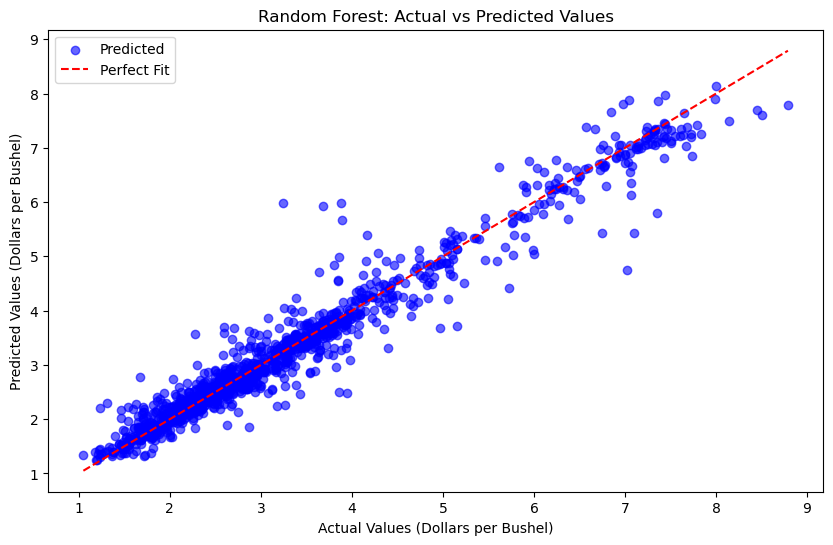

In [85]:
import matplotlib.pyplot as plt

# Step 6: Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))

# Plot the actual values vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted')

# Plot the perfect fit line (diagonal line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')

# Titles and labels
plt.title('Random Forest: Actual vs Predicted Values')
plt.xlabel('Actual Values (Dollars per Bushel)')
plt.ylabel('Predicted Values (Dollars per Bushel)')

# Show legend
plt.legend()

# Show plot
plt.show()


In [46]:
dollars_per_cwt
# Dollars per cwt:
# Used for livestock and other bulk commodities like meat or dairy products (e.g., cattle, hogs, milk). 
# If you're working with livestock or products sold by weight in large quantities, this would be more suitable.

,SC_GeographyIndented_Desc,SC_Commodity_Desc,SC_Attribute_Desc,SC_Unit_Desc,Year_ID,Timeperiod_Desc,Amount,Season
72111,U.S. - Midwest,Corn starch,"Prices, market",Dollars per cwt,2002,Jan,12.160000,Winter
72112,U.S. - Midwest,Corn starch,"Prices, market",Dollars per cwt,2002,Feb,12.280000,Winter
72113,U.S. - Midwest,Corn starch,"Prices, market",Dollars per cwt,2002,Mar,12.490000,Spring
72114,U.S. - Midwest,Corn starch,"Prices, market",Dollars per cwt,2002,Apr,12.550000,Spring
72115,U.S. - Midwest,Corn starch,"Prices, market",Dollars per cwt,2002,May,12.520000,Spring
...,...,...,...,...,...,...,...,...
88732,"U.S. - New York, NY",Brewers grits,"Prices, market",Dollars per cwt,2024,Jul,26.740000,Summer
88733,"U.S. - New York, NY",Brewers grits,"Prices, market",Dollars per cwt,2024,Aug,26.210000,Summer
88734,"U.S. - New York, NY",Brewers grits,"Prices, market",Dollars per cwt,2024,Sep,26.400000,Fall
88735,"U.S. - New York, NY",Brewers grits,"Prices, market",Dollars per cwt,2024,Oct,26.621667,Fall


In [99]:
# Step 1: Prepare the feature columns
X = dollars_per_cwt[['Timeperiod_Desc', 'Season', 'SC_GeographyIndented_Desc', 
                        'SC_Commodity_Desc', 'SC_Attribute_Desc', 'SC_Unit_Desc', 'Year_ID']]  # Features

y = dollars_per_cwt['Amount']  # Target variable

# Convert categorical variables into dummy variables
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical columns

# Step 2: Split the data into train and test sets (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Random Forest model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Initialize with 100 trees
rf_model.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Step 5: Calculate RMSE, MAE, and R² score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"RMSE for Random Forest on Dollars per CWT: {rmse}")
print(f"MAE for Random Forest on Dollars per CWT: {mae}")
print(f"R² Score for Random Forest on Dollars per CWT: {r2}")

# Optionally, display predictions vs actual values for comparison
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())


RMSE for Random Forest on Dollars per CWT: 1.0682394070605306
MAE for Random Forest on Dollars per CWT: 0.7251675005776999
R² Score for Random Forest on Dollars per CWT: 0.9795745781980764
        Actual  Predicted
75349   5.0800   4.435900
79460   7.3350   8.867480
85966  15.4500  16.465675
79690   4.4800   4.650700
78555  13.1525  12.529168


RMSE for Random Forest: 1.0675286768577734


C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


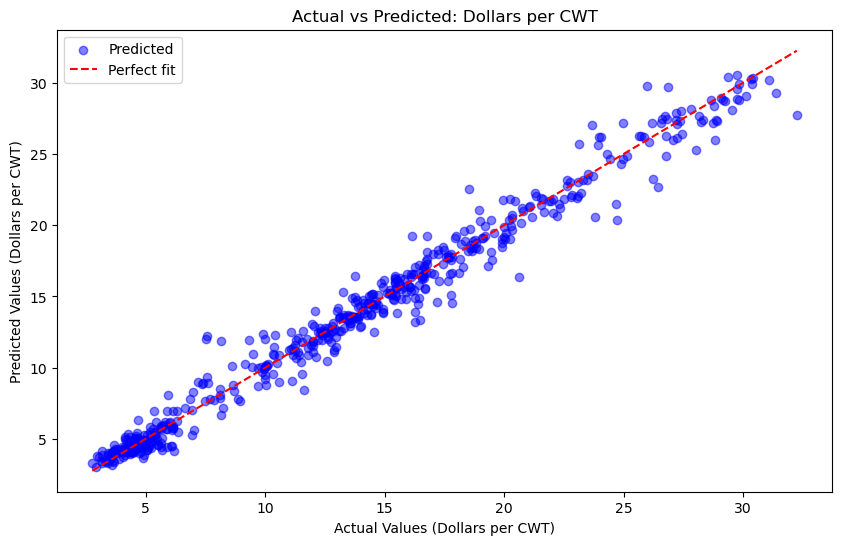

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'dollars_per_cwt' is your dataset
# Prepare the data: Select the relevant columns
features = ['SC_GeographyIndented_Desc', 'SC_Commodity_Desc', 'SC_Attribute_Desc', 
            'SC_Unit_Desc', 'Year_ID', 'Timeperiod_Desc', 'Season']  # Modify as per your dataset's features
target = 'Amount'  # Target variable: 'Amount'

# Handle categorical variables: Use one-hot encoding or label encoding for categorical variables
dollars_per_cwt_encoded = pd.get_dummies(dollars_per_cwt[features], drop_first=True)

# Target variable
y = dollars_per_cwt[target]

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(dollars_per_cwt_encoded, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE for Random Forest: {rmse}')

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect fit')
plt.xlabel('Actual Values (Dollars per CWT)')
plt.ylabel('Predicted Values (Dollars per CWT)')
plt.title('Actual vs Predicted: Dollars per CWT')
plt.legend()
plt.show()


In [48]:
cents_per_pound
# Cents per pound:
# Common for commodities like cocoa, coffee, and other food products that are sold in smaller, consumer quantities. 
# If you're looking at pricing for smaller items, this might be appropriate.

,SC_GeographyIndented_Desc,SC_Commodity_Desc,SC_Attribute_Desc,SC_Unit_Desc,Year_ID,Timeperiod_Desc,Amount,Season
72403,U.S. - Midwest,"HFCS, 42%","Prices, market",Cents per pound,1983,Sep,20.92,Fall
72404,U.S. - Midwest,"HFCS, 42%","Prices, market",Cents per pound,1983,Oct,20.92,Fall
72405,U.S. - Midwest,"HFCS, 42%","Prices, market",Cents per pound,1983,Nov,20.92,Fall
72406,U.S. - Midwest,"HFCS, 42%","Prices, market",Cents per pound,1983,Dec,20.92,Winter
72407,U.S. - Midwest,"HFCS, 42%","Prices, market",Cents per pound,1984,Jan,20.00,Winter
...,...,...,...,...,...,...,...,...
81925,U.S. - Midwest,Corn syrup,"Prices, market",Cents per pound,2024,Jul,48.50,Summer
81926,U.S. - Midwest,Corn syrup,"Prices, market",Cents per pound,2024,Aug,48.50,Summer
81927,U.S. - Midwest,Corn syrup,"Prices, market",Cents per pound,2024,Sep,48.50,Fall
81928,U.S. - Midwest,Corn syrup,"Prices, market",Cents per pound,2024,Oct,48.50,Fall


In [105]:
# Step 1: Prepare the feature columns
X = cents_per_pound[['Timeperiod_Desc', 'Season', 'SC_GeographyIndented_Desc', 
                        'SC_Commodity_Desc', 'SC_Attribute_Desc', 'SC_Unit_Desc', 'Year_ID']]  # Features

y = cents_per_pound['Amount']  # Target variable

# Convert categorical variables into dummy variables
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical columns

# Step 2: Split the data into train and test sets (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Random Forest model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=10, random_state=42)  # Initialize with 100 trees
rf_model.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Step 5: Calculate RMSE, MAE, and R² score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"RMSE for Random Forest on Cents per Pound: {rmse}")
print(f"MAE for Random Forest on Cents per Pound: {mae}")
print(f"R² Score for Random Forest on Cents per Pound: {r2}")

# Optionally, display predictions vs actual values for comparison
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())


RMSE for Random Forest on Cents per Pound: 1.6404458398824735
MAE for Random Forest on Cents per Pound: 0.6639097371565111
R² Score for Random Forest on Cents per Pound: 0.9812524245435859
       Actual  Predicted
72744   11.75     11.750
75710   31.35     28.980
73399   30.65     28.590
72948   11.80     13.587
73058   12.75     12.750


RMSE for Random Forest: 1.7334233986513286


C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


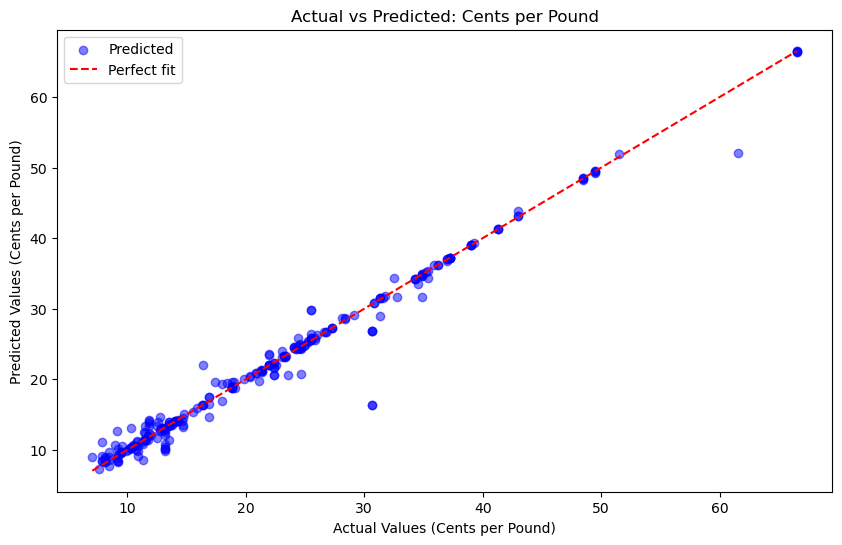

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare the data: Select the relevant columns
features = ['SC_GeographyIndented_Desc', 'SC_Commodity_Desc', 'SC_Attribute_Desc', 
            'SC_Unit_Desc', 'Year_ID', 'Timeperiod_Desc', 'Season']  # Modify as per your dataset's features
target = 'Amount'  # Target variable: 'Amount'

# Handle categorical variables: Use one-hot encoding or label encoding for categorical variables
cents_per_pound_encoded = pd.get_dummies(cents_per_pound[features], drop_first=True)

# Target variable
y = cents_per_pound[target]

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(cents_per_pound_encoded, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE for Random Forest: {rmse}')

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect fit')
plt.xlabel('Actual Values (Cents per Pound)')
plt.ylabel('Predicted Values (Cents per Pound)')
plt.title('Actual vs Predicted: Cents per Pound')
plt.legend()
plt.show()